In [15]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"ghadaalamrri","key":"ff19d8e4ba90db64e6a745c398265f3c"}'}

In [16]:
!pip install -U opendatasets -q
import opendatasets as od
od.download("https://www.kaggle.com/datasets/msambare/fer2013", force= True)

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|██████████| 60.3M/60.3M [00:00<00:00, 1.03GB/s]

In [21]:
!ls -l /content

total 20
drwxr-xr-x 4 root root 4096 Apr 28 17:06  fer2013
-rw-r--r-- 1 root root   68 Apr 28 16:41 'kaggle (1).json'
-rw-r--r-- 1 root root   68 Apr 28 17:06 'kaggle (2).json'
-rw-r--r-- 1 root root   68 Apr 28 16:47  kaggle.json
drwxr-xr-x 1 root root 4096 Apr 25 17:44  sample_data


In [22]:
!ls -l /content/fer2013

total 8
drwxr-xr-x 9 root root 4096 Apr 28 16:45 test
drwxr-xr-x 9 root root 4096 Apr 28 16:45 train


## Loading the data

In [23]:
import tensorflow as tf

In [24]:
# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/fer2013/train',
    image_size=(48, 48),
    color_mode='grayscale',  # FER2013 images are grayscale
    batch_size=32
)

Found 28709 files belonging to 7 classes.


In [25]:
# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/fer2013/test',
    image_size=(48, 48),
    color_mode='grayscale',
    batch_size=32
)

Found 7178 files belonging to 7 classes.


# EDA

## Class Names and Counts

In [26]:
import os

train_path = '/content/fer2013/train'

# List of classes
class_names = os.listdir(train_path)
print("Classes:", class_names)

# Number of images per class
for class_name in class_names:
    num_images = len(os.listdir(os.path.join(train_path, class_name)))
    print(f"{class_name}: {num_images} images")

Classes: ['angry', 'neutral', 'happy', 'surprise', 'disgust', 'fear', 'sad']
angry: 3995 images
neutral: 4965 images
happy: 7215 images
surprise: 3171 images
disgust: 436 images
fear: 4097 images
sad: 4830 images


## Visualization

In [27]:
import matplotlib.pyplot as plt
import cv2

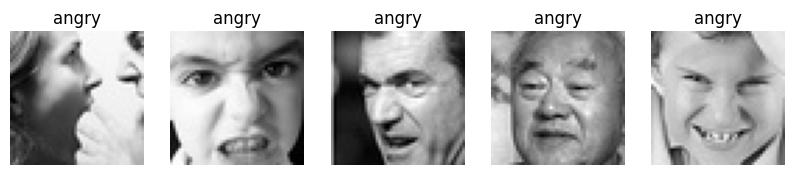

In [39]:
emotion = class_names[0]

images = os.listdir(os.path.join(train_path, emotion))

# Plot sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    img_path = os.path.join(train_path, emotion, images[i])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')
plt.show()

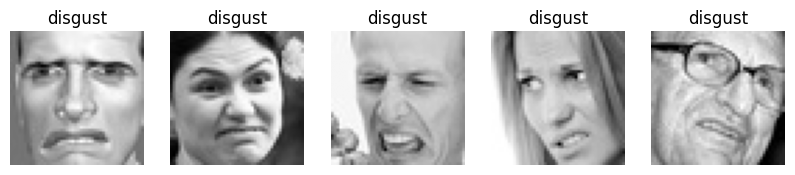

In [40]:
emotion = class_names[4]

images = os.listdir(os.path.join(train_path, emotion))

# Plot sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    img_path = os.path.join(train_path, emotion, images[i])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')
plt.show()

## Checking Image Sizes

In [31]:
from PIL import Image

In [35]:
# Check file extensions in the train folder
for emotion in class_names:
    folder = os.path.join(train_path, emotion)
    for image_name in os.listdir(folder):
        _, ext = os.path.splitext(image_name)
        print(f"Image: {image_name} has extension: {ext}")


Image: Training_99062607.jpg has extension: .jpg
Image: Training_49144817.jpg has extension: .jpg
Image: Training_21536509.jpg has extension: .jpg
Image: Training_43404630.jpg has extension: .jpg
Image: Training_90865450.jpg has extension: .jpg
Image: Training_80818570.jpg has extension: .jpg
Image: Training_54677097.jpg has extension: .jpg
Image: Training_73677822.jpg has extension: .jpg
Image: Training_31442578.jpg has extension: .jpg
Image: Training_77632091.jpg has extension: .jpg
Image: Training_11036720.jpg has extension: .jpg
Image: Training_75894484.jpg has extension: .jpg
Image: Training_32473963.jpg has extension: .jpg
Image: Training_21398238.jpg has extension: .jpg
Image: Training_4972797.jpg has extension: .jpg
Image: Training_70557281.jpg has extension: .jpg
Image: Training_58811677.jpg has extension: .jpg
Image: Training_98307225.jpg has extension: .jpg
Image: Training_69606671.jpg has extension: .jpg
Image: Training_8513502.jpg has extension: .jpg
Image: Training_648677

In [36]:
# Open one image
sample_image_path = os.path.join(train_path, class_names[0], os.listdir(os.path.join(train_path, class_names[0]))[0])
img = Image.open(sample_image_path)

print(f"Sample image size: {img.size}")

Sample image size: (48, 48)


In [37]:
# Flag to track if all images are 48x48
all_images_correct_size = True

# Check if all images are 48x48
for emotion in class_names:
    folder = os.path.join(train_path, emotion)
    for image_name in os.listdir(folder):
        img_path = os.path.join(folder, image_name)
        img = Image.open(img_path)
        if img.size != (48, 48):
            print(f"Issue with {img_path}: size {img.size}")
            all_images_correct_size = False

if all_images_correct_size:
    print("All images are 48x48.")


All images are 48x48.
